# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc

2024-05-14 09:54:30,621 - qm - INFO     - Starting session: 8805a6be-a704-4ca2-b51b-bf5171a20279


# Load .nc file 

### single file

In [27]:
save_dir = r"C:\Users\quant\SynologyDrive\09 Data\Fridge Data\Qubit\20240510_DR4_5Q4C_0411#6\02 q2 c1 c2"
save_name = "flux_resonator_q6_z_20240513_1650"

save_path = f"{save_dir}\{save_name}"
load_path =  f"{save_path}.nc"

dataset = xr.open_dataset(load_path)

print(dataset)

<xarray.Dataset> Size: 1MB
Dimensions:    (mixer: 2, frequency: 100, flux: 800)
Coordinates:
  * mixer      (mixer) <U1 8B 'I' 'Q'
  * frequency  (frequency) float64 800B -5.0 -4.9 -4.8 -4.7 ... 4.6 4.7 4.8 4.9
  * flux       (flux) float64 6kB -0.4 -0.399 -0.398 ... 0.397 0.398 0.399
Data variables:
    q7_ro      (mixer, frequency, flux) float64 1MB ...


### multiple files

In [42]:
datasets = []

save_dir = r"C:\Users\quant\SynologyDrive\09 Data\Fridge Data\Qubit\20240510_DR4_5Q4C_0411#6\02 q2 c1 c2"
save_names = "flux_resonator_q2_z_20240513_1649", "flux_resonator_q6_z_20240513_1650", "flux_resonator_q7_z_20240513_1651"

for save_name in save_names:
    save_path = f"{save_dir}\{save_name}"
    load_path =  f"{save_path}.nc"

    dataset = xr.open_dataset(load_path)

    datasets.append(dataset)

print(f"number of nc files imported: {len(datasets)} \n")
print(datasets)

number of nc files imported: 3 

[<xarray.Dataset> Size: 1MB
Dimensions:    (mixer: 2, frequency: 100, flux: 800)
Coordinates:
  * mixer      (mixer) <U1 8B 'I' 'Q'
  * frequency  (frequency) float64 800B -5.0 -4.9 -4.8 -4.7 ... 4.6 4.7 4.8 4.9
  * flux       (flux) float64 6kB -0.4 -0.399 -0.398 ... 0.397 0.398 0.399
Data variables:
    q7_ro      (mixer, frequency, flux) float64 1MB ..., <xarray.Dataset> Size: 1MB
Dimensions:    (mixer: 2, frequency: 100, flux: 800)
Coordinates:
  * mixer      (mixer) <U1 8B 'I' 'Q'
  * frequency  (frequency) float64 800B -5.0 -4.9 -4.8 -4.7 ... 4.6 4.7 4.8 4.9
  * flux       (flux) float64 6kB -0.4 -0.399 -0.398 ... 0.397 0.398 0.399
Data variables:
    q7_ro      (mixer, frequency, flux) float64 1MB ..., <xarray.Dataset> Size: 1MB
Dimensions:    (mixer: 2, frequency: 100, flux: 800)
Coordinates:
  * mixer      (mixer) <U1 8B 'I' 'Q'
  * frequency  (frequency) float64 800B -5.0 -4.9 -4.8 -4.7 ... 4.6 4.7 4.8 4.9
  * flux       (flux) float64 6kB -0.

# S3

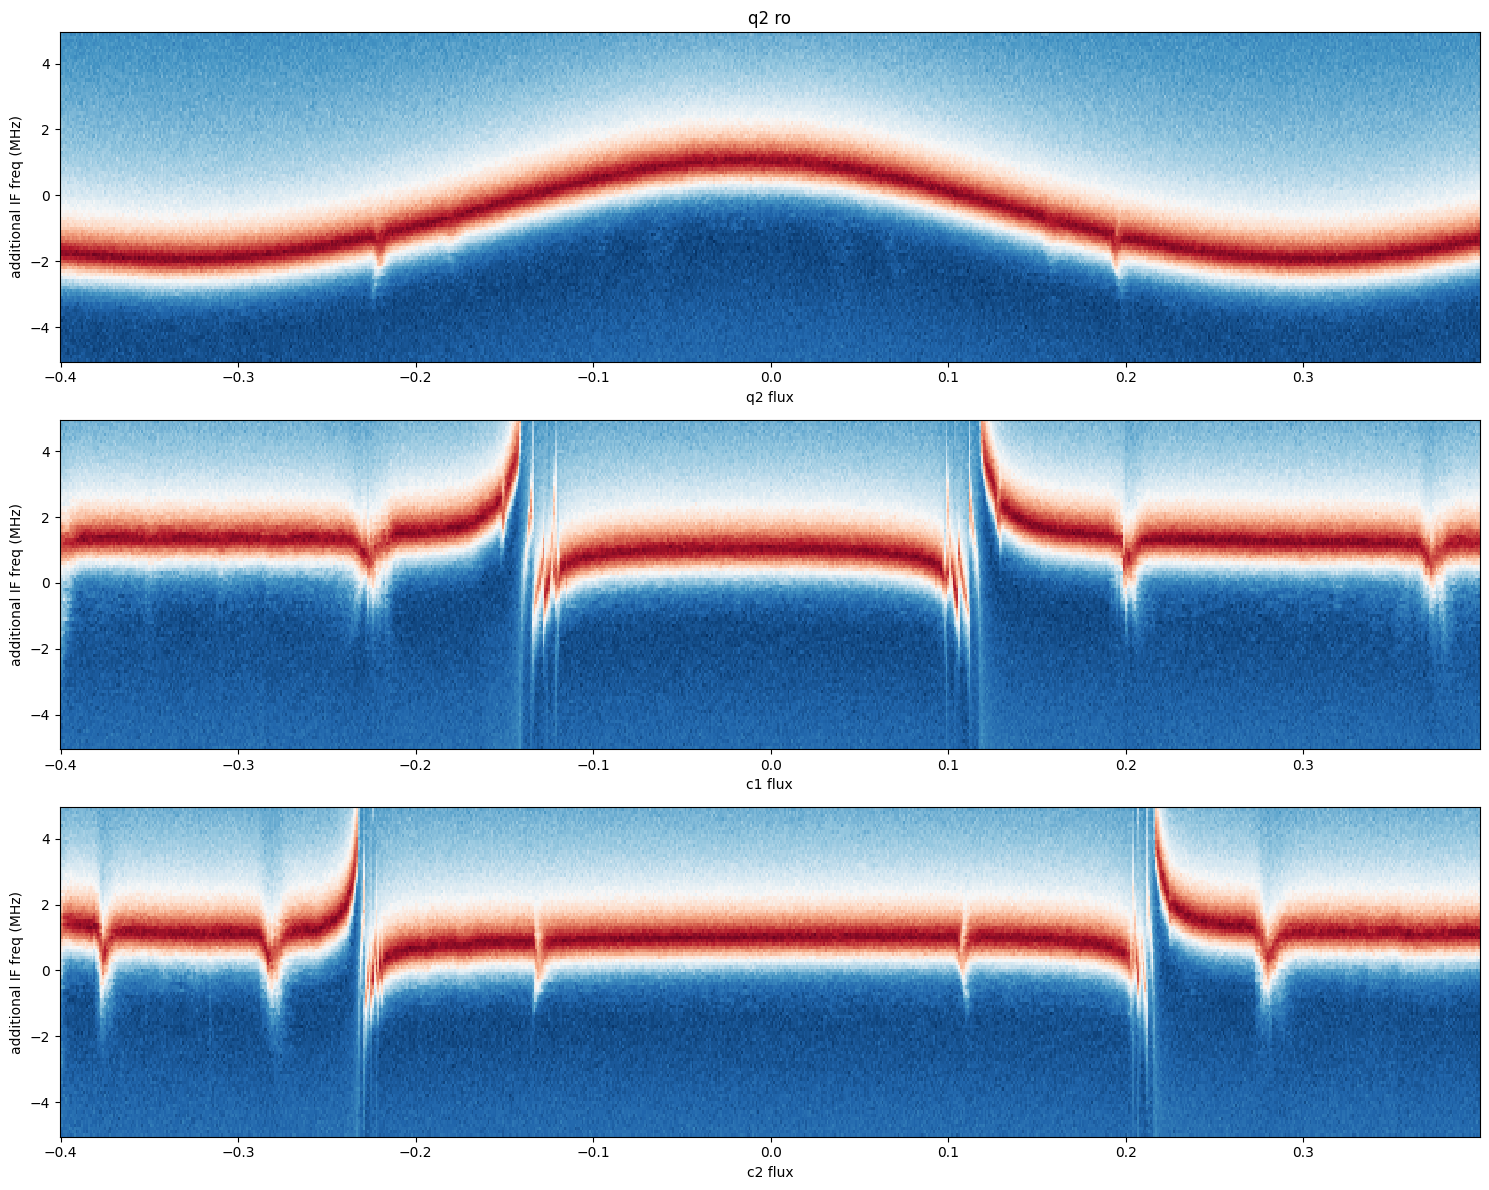

In [49]:
from exp.rofreq_sweep_flux_dep import plot_flux_dep_resonator

fig, ax = plt.subplots(3,1, figsize=(15,12))

for i in range(len(datasets)):
    dataset = datasets[i]
    dfs = dataset.coords["frequency"].values
    amps = dataset.coords["flux"].values
    for ro_name, data in dataset.data_vars.items():
        plot_flux_dep_resonator( data.values, dfs, amps, ax[i])

ax[0].set_title("q2 ro")
ax[0].set_xlabel("q2 flux")
ax[1].set_xlabel("c1 flux")
ax[2].set_xlabel("c2 flux")

plt.tight_layout()
plt.show()